# Volcano plot

In [65]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [66]:
# Load packages
library(dplyr)
library(ggplot2)

# Install ggrepel package if needed
# install.packages("devtools")
# devtools::install_github("slowkow/ggrepel")
library(ggrepel) #To be able to make ggplot without overlapping labeling
library(glue)

In [67]:
# Read data from the web
res_file_name = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
annot_file_name = "../../input/HILICpos_mzML/asari_project_output_727153535/Feature_annotation.tsv"
res_df = read.table(res_file_name, row.names = 1,header=TRUE, sep = ',')

In [68]:
head(res_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,0.0000000,70477.00,0,118403.5,0.3333333,33095.50,15.90627,17.05434,14.35138,1.14807506,-1.5548861,-2.7029612,8.8937320,1.604757e-02,0.0477060464,2.525009e-01,0.11346999,1.340772e-02,0.569658669,0.4245410,0.043642705,14.72954,16.52419,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,0.0000000,150293.00,0,141202.2,0.0000000,140867.67,17.07746,17.30965,15.63098,0.23218340,-1.4464799,-1.6786633,0.6509183,5.548268e-01,0.6244123004,9.883995e-01,0.65587558,5.741049e-01,1.000000000,0.9640687,0.727410344,17.57323,17.42220,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,0.0000000,58362.33,1,NA,0.0000000,127009.33,15.81875,12.01507,16.72202,-3.80368821,0.9032661,4.7069543,164.8421502,5.710323e-06,0.0005958801,2.179699e-05,0.03849116,5.862164e-06,0.002442381,0.2762009,0.000826376,15.98142,15.86099,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,0.6666667,119684.00,1,NA,0.0000000,157185.67,15.55525,14.89055,17.06225,-0.66469949,1.5070002,2.1716997,7.4844840,2.342732e-02,0.0612671337,5.185935e-01,0.08764415,2.156493e-02,0.849102118,0.3837725,0.060487001,14.89055,14.89055,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,0.0000000,573708.67,0,527570.3,0.0000000,420937.67,19.11073,19.20785,18.51229,0.09712025,-0.5984424,-0.6955626,11.5954627,8.683807e-03,0.0315446686,8.145709e-01,0.02037338,1.032288e-02,1.000000000,0.2176814,0.036409179,18.79916,19.33012,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,0.0000000,17758.00,0,23847.5,0.0000000,19529.67,14.07489,14.63280,13.93522,0.55791087,-0.1396680,-0.6975789,0.7671954,5.050208e-01,0.5786421349,6.394432e-01,0.97032238,5.107099e-01,0.938019256,1.0000000,0.671420627,14.18142,14.40873,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330,17.59065,16.99836,17.16847


-------

-------

-------

## Create output directory

In [69]:
out_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/volcano_plot/"
dir.create(out_dir)

Warning message in dir.create(out_dir):
“'../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/volcano_plot' already exists”


In [70]:
head(res_df,2)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,0,70477,0,118403.5,0.3333333,33095.5,15.90627,17.05434,14.35138,1.1480751,-1.554886,-2.702961,8.8937320,0.01604757,0.04770605,0.2525009,0.1134700,0.01340772,0.5696587,0.4245410,0.04364271,14.72954,16.52419,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,0,150293,0,141202.2,0.0000000,140867.7,17.07746,17.30965,15.63098,0.2321834,-1.446480,-1.678663,0.6509183,0.55482676,0.62441230,0.9883995,0.6558756,0.57410487,1.0000000,0.9640687,0.72741034,17.57323,17.42220,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345,17.66144,17.55834,17.36552


------

------

------

------

------

# Volcano plot
## log2FC R5pos vs R5neg

In [71]:
padj_colname = 'TFDR_R5pos.R5neg'
log2FC_colname = 'log2FC_R5posvsR5neg'
contrast = "R5pos vs. R5neg"

In [72]:
want2annotate_feature_name = TRUE
topN = 1000

select_topN2present <- function(res_df, annot_df, topN, padj_label) {
    res_df = res_df %>% arrange_(padj_colname) 
    featIDs = rownames(res_df[1:topN,])
    annot_list = list()
    res_df['highlight'] = ""
    for (featID in featIDs) {
        res_df[featID,'highlight'] = annot_df[annot_df['X.peak.id_number']==featID,'name_1st_guess'][1]
    }
    
    return(res_df)
}

if(want2annotate_feature_name) {
    annot_df = read.csv(annot_file_name, sep = '\t') #somehow only dplyr read.csv works 
    res_df = select_topN2present(res_df, annot_df, topN)
}

## Volcano plot function

In [73]:
volcano_plot <- function(res_df = res_df,
                            padj_colname = padj_colname,
                            log2FC_colname = log2FC_colname,
                            p_cut_off = p_cut_off,
                            log2FC_cut_off = log2FC_cut_off,
                            xlab = xlab,
                            ylab = 'log10(FDR)',
                            xlim = xlim,
                            ylim = ylim,
                            highlight_text = FALSE,
                            fig_width = 8,
                            fig_height = 8,
                            text_size = 20,
                            legend_size = 20,
                            axis_title_size = 20,
                            output_dir = "",
                            pdf_prefix = 'test',
                            show_plot = TRUE) {
    
    colnames(res_df)
    res_df = mutate(res_df, 
                     Label = ifelse((res_df[,padj_colname] < p_cut_off) & (abs(res_df[,log2FC_colname]) > 1),  # Label is the column that distinguish the coloring
                                  "Significant", 
                                  "Not Sign.")) #mutate is a good function 

    res_df$log10padj = -log(res_df[,padj_colname],10)
    print(paste0("range of log10padj: ", range(res_df$log10padj),'\n', "range of log2FC: ", range(res_df$log2FC)))
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)
    
    hist(res_df[,log2FC_colname], breaks =30)
    
    p = ggplot( res_df, 
                aes_string(log2FC_colname,"log10padj")) +
                geom_point(aes(col=Label), alpha = 0.5) +
                scale_color_manual(values=c("#888888","#ff0000")) +
                xlim(xlim) + 
                ylim(ylim) + 
                xlab(xlab) +
                ylab(ylab) +
                
                theme(
                      panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
                      panel.border = element_rect(fill = NA),
                      #panel.grid.minor = element_blank(),
                      panel.background = element_rect(fill = "transparent",colour = NA),
                      plot.background = element_rect(fill = "transparent",colour = NA),
                      axis.text = element_text(size = text_size, colour="black"),
                      axis.text.x = element_text(colour="black"),
                      legend.text= element_text(size = legend_size),
                      legend.title = element_text(size = legend_size),
                      axis.title = element_text(size = axis_title_size)
                    )
    if(highlight_text == TRUE) {
        print("With highlighted text")
        p = p + geom_text_repel(data = filter(res_df, highlight != ""), aes(label = highlight))
    }
    
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, 
                             glue("volcano_plot",
                                                pdf_prefix,".pdf")), 
                   width = fig_width, 
                   height = fig_height)
        }
}

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"                
[2] "range of log10padj: 9.72304372619408\nrange of log2FC: -Inf"


Warning message:
“Removed 21 rows containing missing values (geom_point).”
Warning message:
“Removed 21 rows containing missing values (geom_point).”


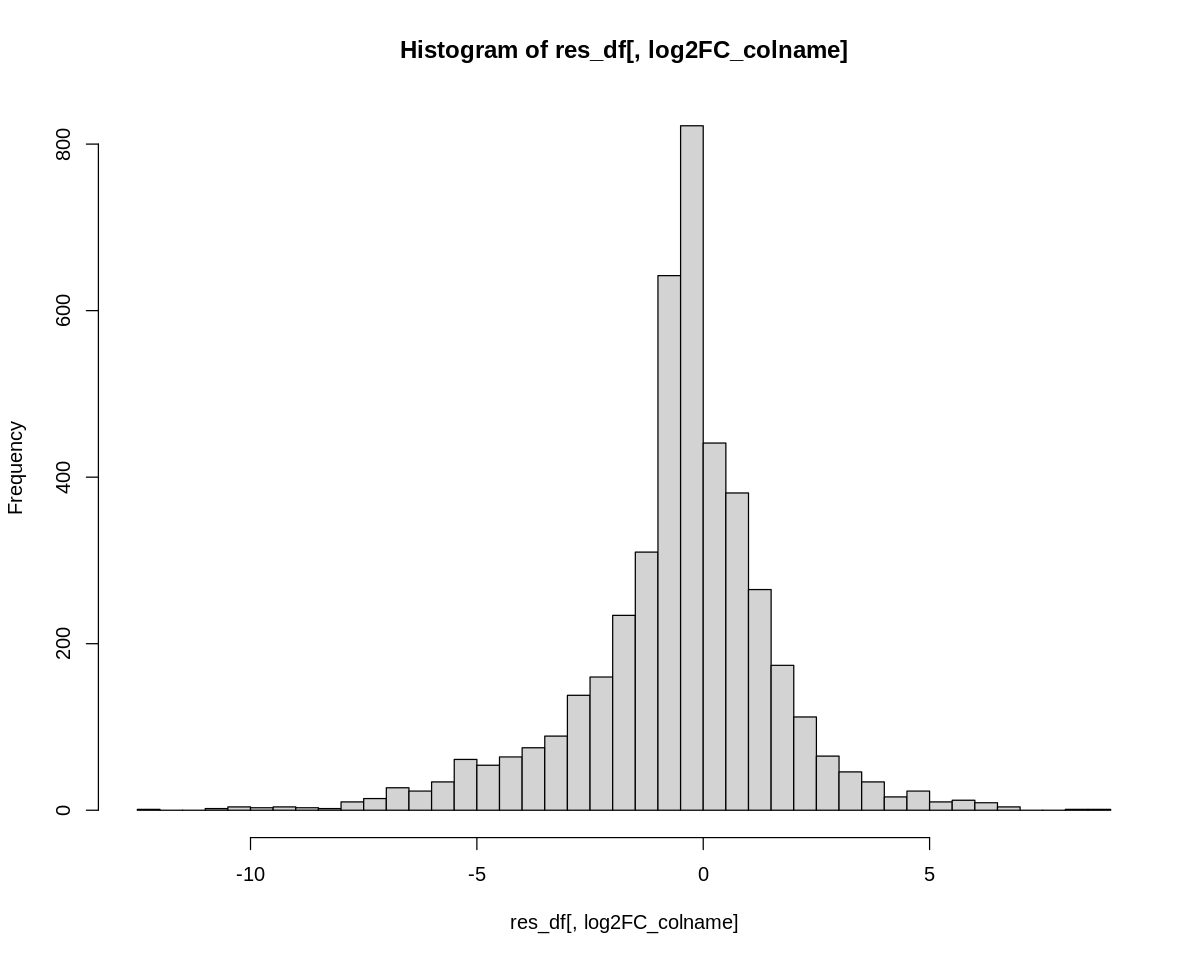

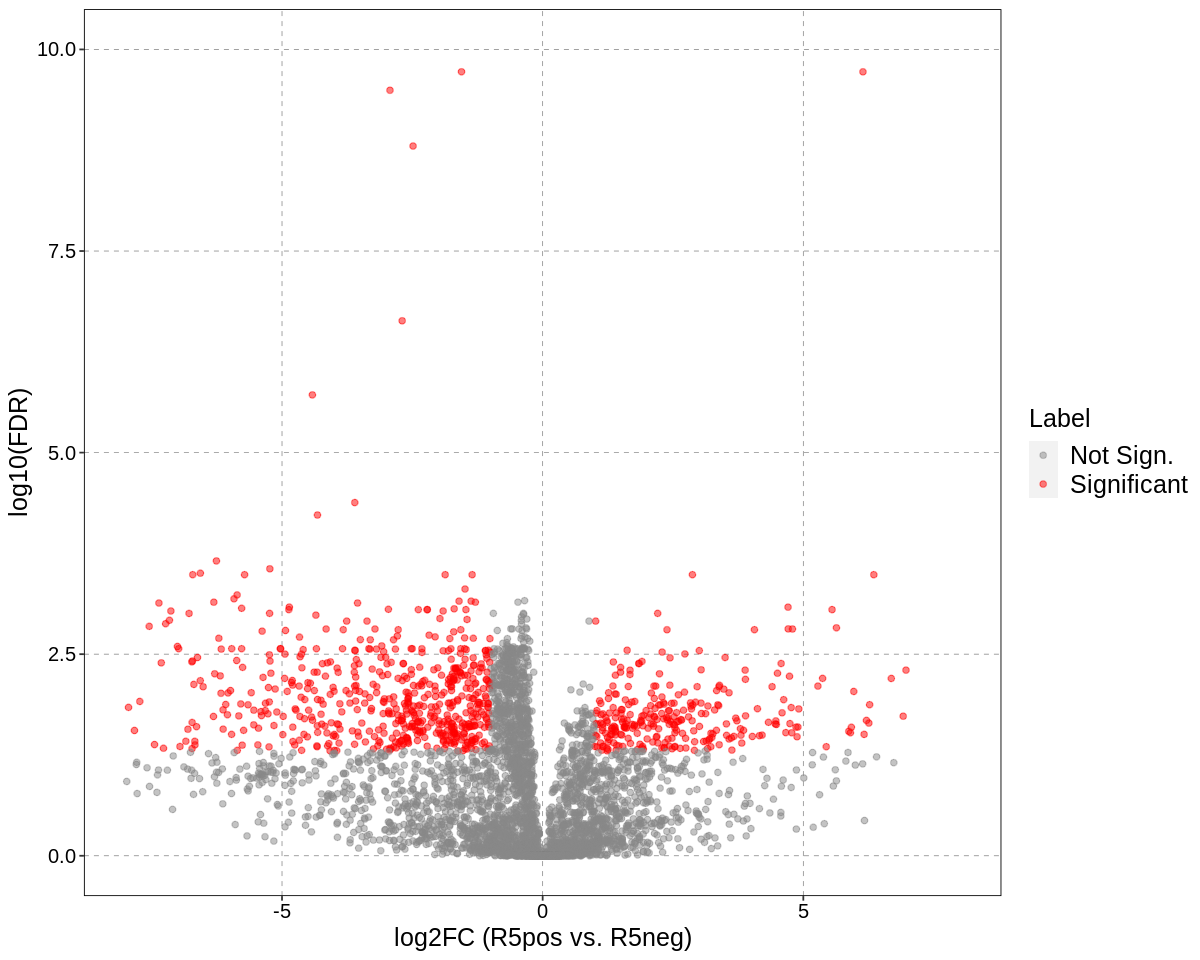

In [74]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = 'contrast',
                show_plot = TRUE)

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"                
[2] "range of log10padj: 9.72304372619408\nrange of log2FC: -Inf"
[1] "With highlighted text"


Warning message:
“Removed 21 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 201 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 21 rows containing missing values (geom_point).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '[(4-{5,14-dihy

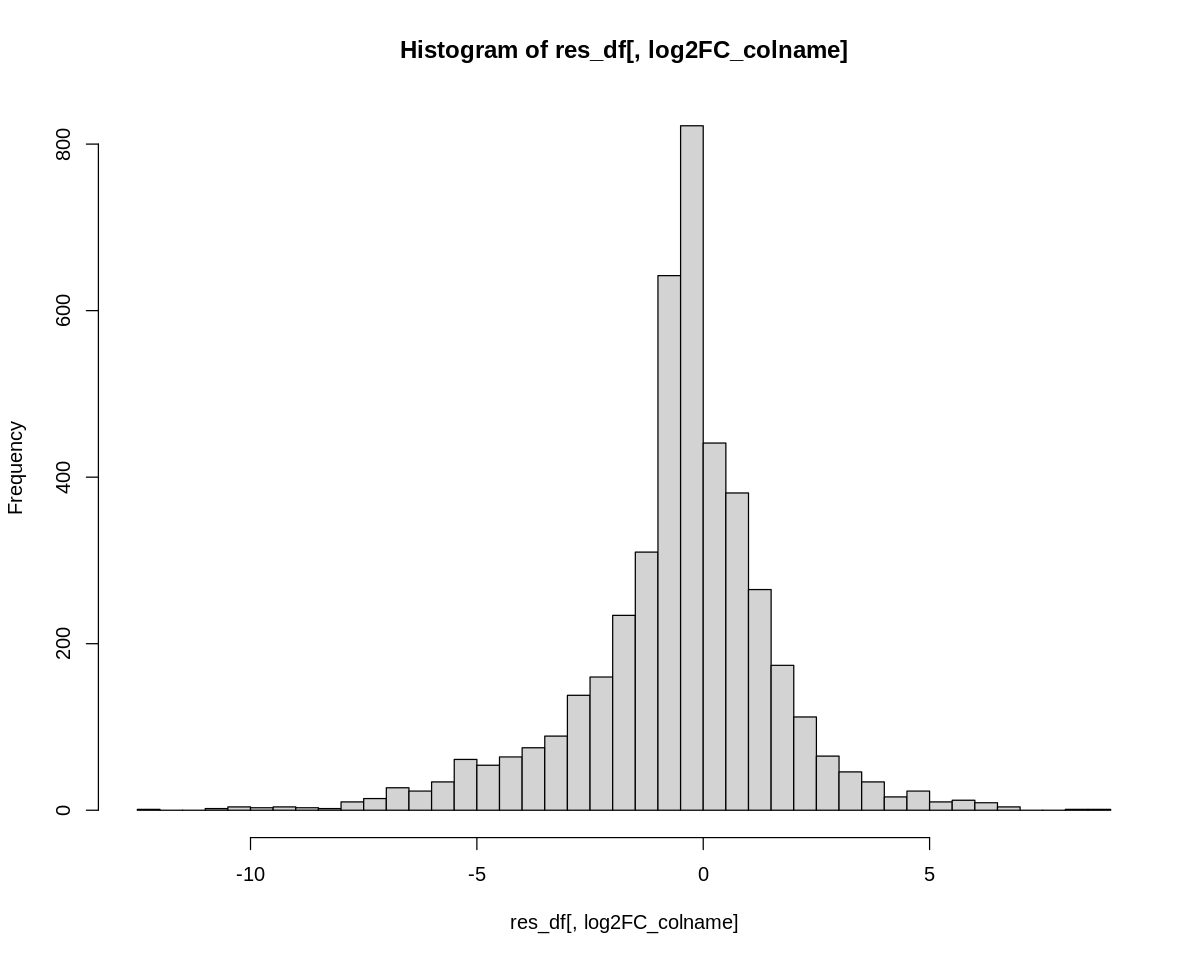

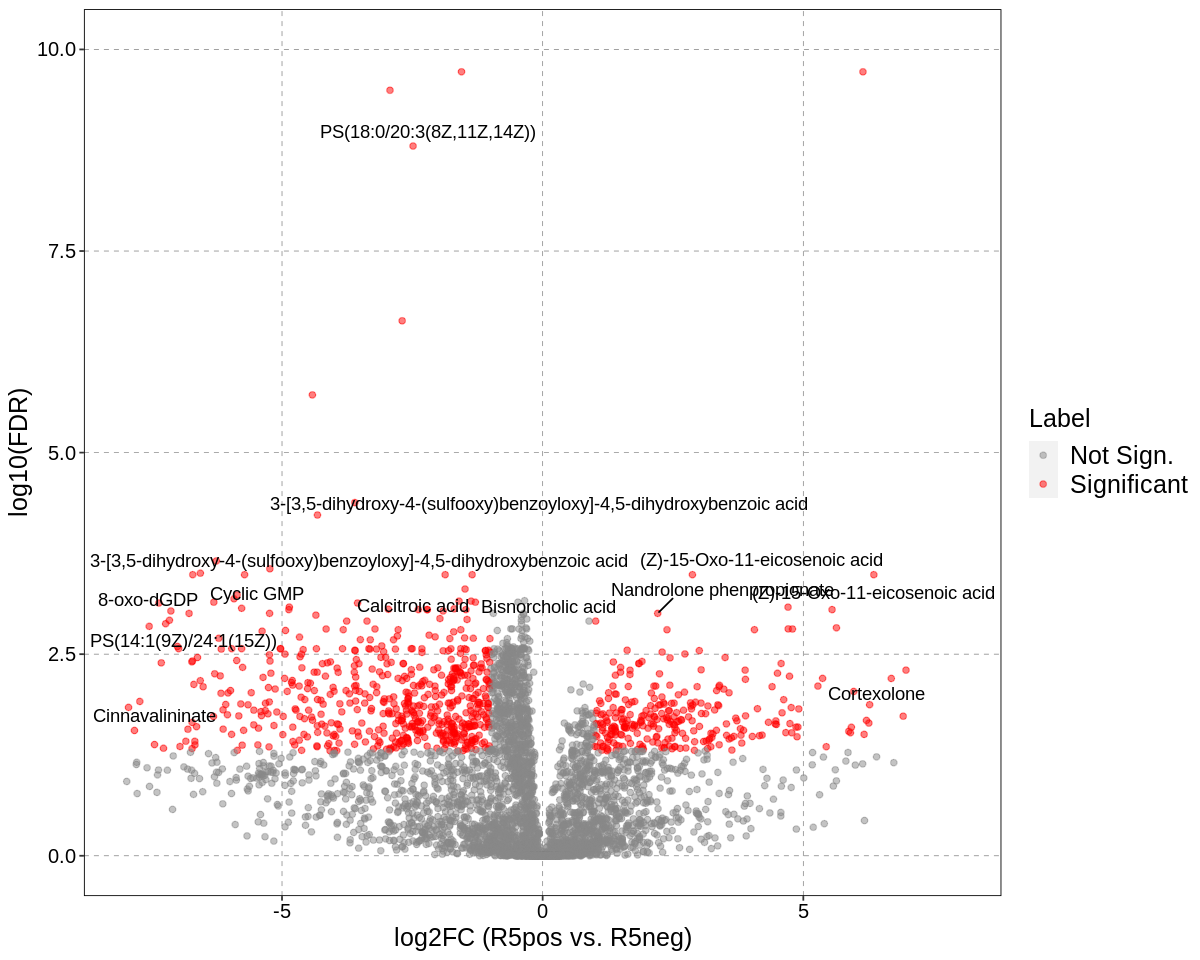

In [75]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('contrast',"highlight"),
                show_plot = TRUE)

--------

------

# Volcano plot
## log2FC R5pos vs Naive

In [76]:
padj_colname = 'TFDR_R5pos.Naive'
log2FC_colname = 'log2FC_R5posvsNaive'
contrast = "R5pos vs. Naive"

In [77]:
want2annotate_feature_name = TRUE
topN = 1000

select_topN2present <- function(res_df, annot_df, topN, padj_label) {
    res_df = res_df %>% arrange_(padj_colname) 
    featIDs = rownames(res_df[1:topN,])
    annot_list = list()
    res_df['highlight'] = ""
    for (featID in featIDs) {
        res_df[featID,'highlight'] = annot_df[annot_df['X.peak.id_number']==featID,'name_1st_guess'][1]
    }
    
    return(res_df)
}

if(want2annotate_feature_name) {
    annot_df = read.csv(annot_file_name, sep = '\t') #somehow only dplyr read.csv works 
    res_df = select_topN2present(res_df, annot_df, topN)
}

## Volcano plot function

In [78]:
volcano_plot <- function(res_df = res_df,
                            padj_colname = padj_colname,
                            log2FC_colname = log2FC_colname,
                            p_cut_off = p_cut_off,
                            log2FC_cut_off = log2FC_cut_off,
                            xlab = xlab,
                            ylab = 'log10(FDR)',
                            xlim = xlim,
                            ylim = ylim,
                            highlight_text = FALSE,
                            fig_width = 8,
                            fig_height = 8,
                            text_size = 20,
                            legend_size = 20,
                            axis_title_size = 20,
                            output_dir = "",
                            pdf_prefix = 'test',
                            show_plot = TRUE) {
    
    colnames(res_df)
    res_df = mutate(res_df, 
                     Label = ifelse((res_df[,padj_colname] < p_cut_off) & (abs(res_df[,log2FC_colname]) > 1),  # Label is the column that distinguish the coloring
                                  "Significant", 
                                  "Not Sign.")) #mutate is a good function 

    res_df$log10padj = -log(res_df[,padj_colname],10)
    print(paste0("range of log10padj: ", range(res_df$log10padj),'\n', "range of log2FC: ", range(res_df$log2FC)))
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)
    
    hist(res_df[,log2FC_colname], breaks =30)
    
    p = ggplot( res_df, 
                aes_string(log2FC_colname,"log10padj")) +
                geom_point(aes(col=Label), alpha = 0.5) +
                scale_color_manual(values=c("#888888","#ff0000")) +
                xlim(xlim) + 
                ylim(ylim) + 
                xlab(xlab) +
                ylab(ylab) +
                
                theme(
                      panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
                      panel.border = element_rect(fill = NA),
                      #panel.grid.minor = element_blank(),
                      panel.background = element_rect(fill = "transparent",colour = NA),
                      plot.background = element_rect(fill = "transparent",colour = NA),
                      axis.text = element_text(size = text_size, colour="black"),
                      axis.text.x = element_text(colour="black"),
                      legend.text= element_text(size = legend_size),
                      legend.title = element_text(size = legend_size),
                      axis.title = element_text(size = axis_title_size)
                    )
    if(highlight_text == TRUE) {
        print("With highlighted text")
        p = p + geom_text_repel(data = filter(res_df, highlight != ""), aes(label = highlight))
    }
    
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, 
                             glue("volcano_plot",
                                                pdf_prefix,".pdf")), 
                   width = fig_width, 
                   height = fig_height)
        }
}

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"                
[2] "range of log10padj: 4.37014778949819\nrange of log2FC: -Inf"


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


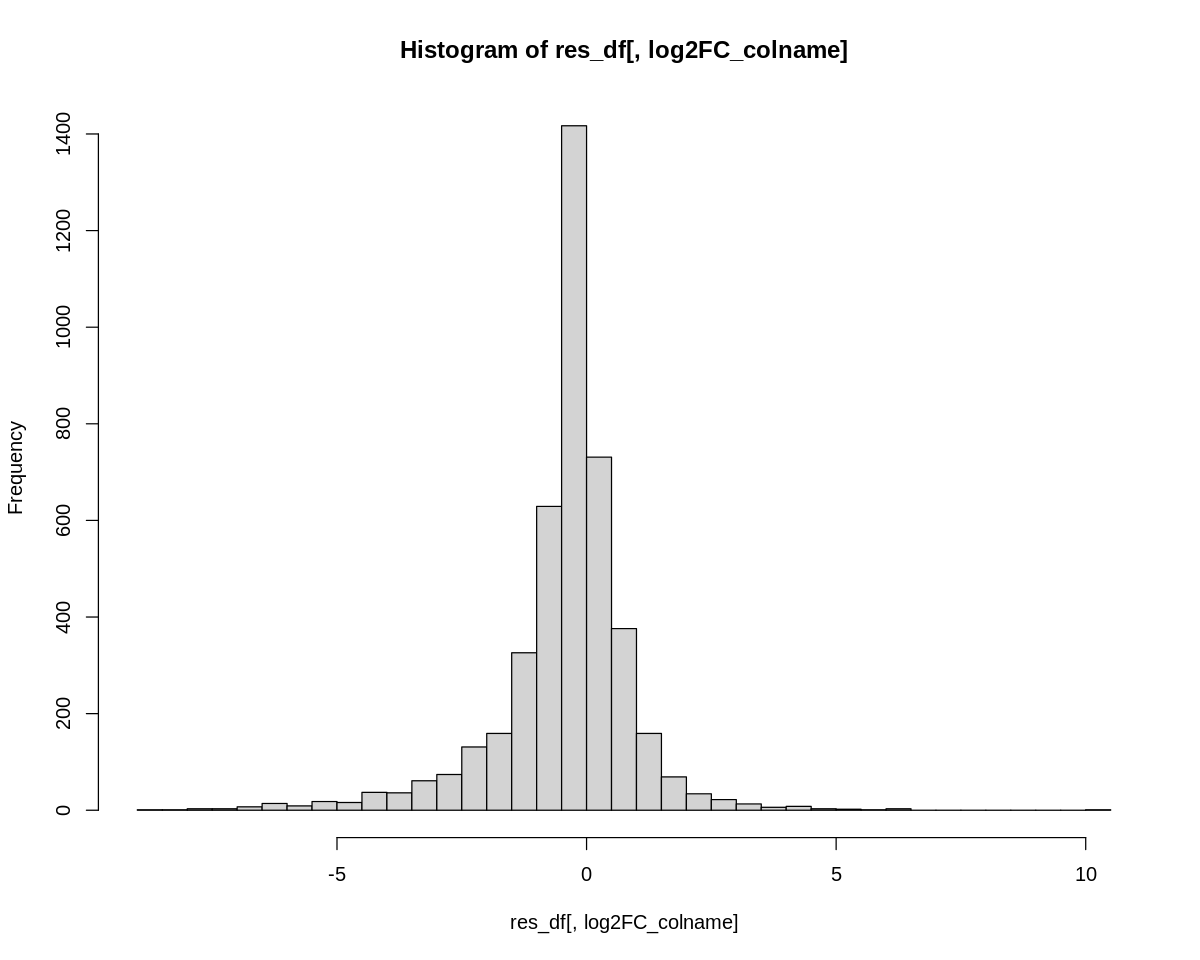

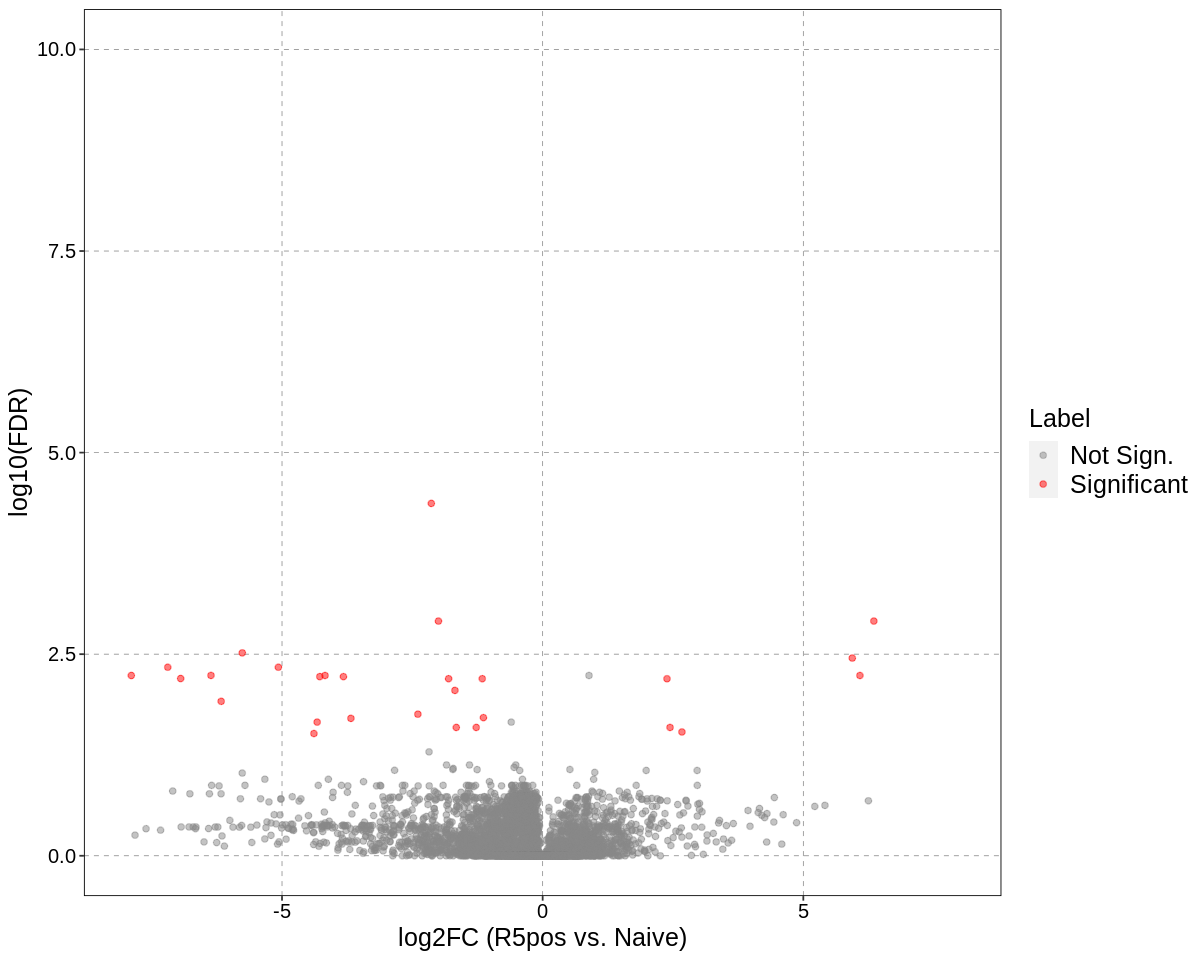

In [79]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = 'contrast',
                show_plot = TRUE)

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"                
[2] "range of log10padj: 4.37014778949819\nrange of log2FC: -Inf"
[1] "With highlighted text"


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 236 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 236 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


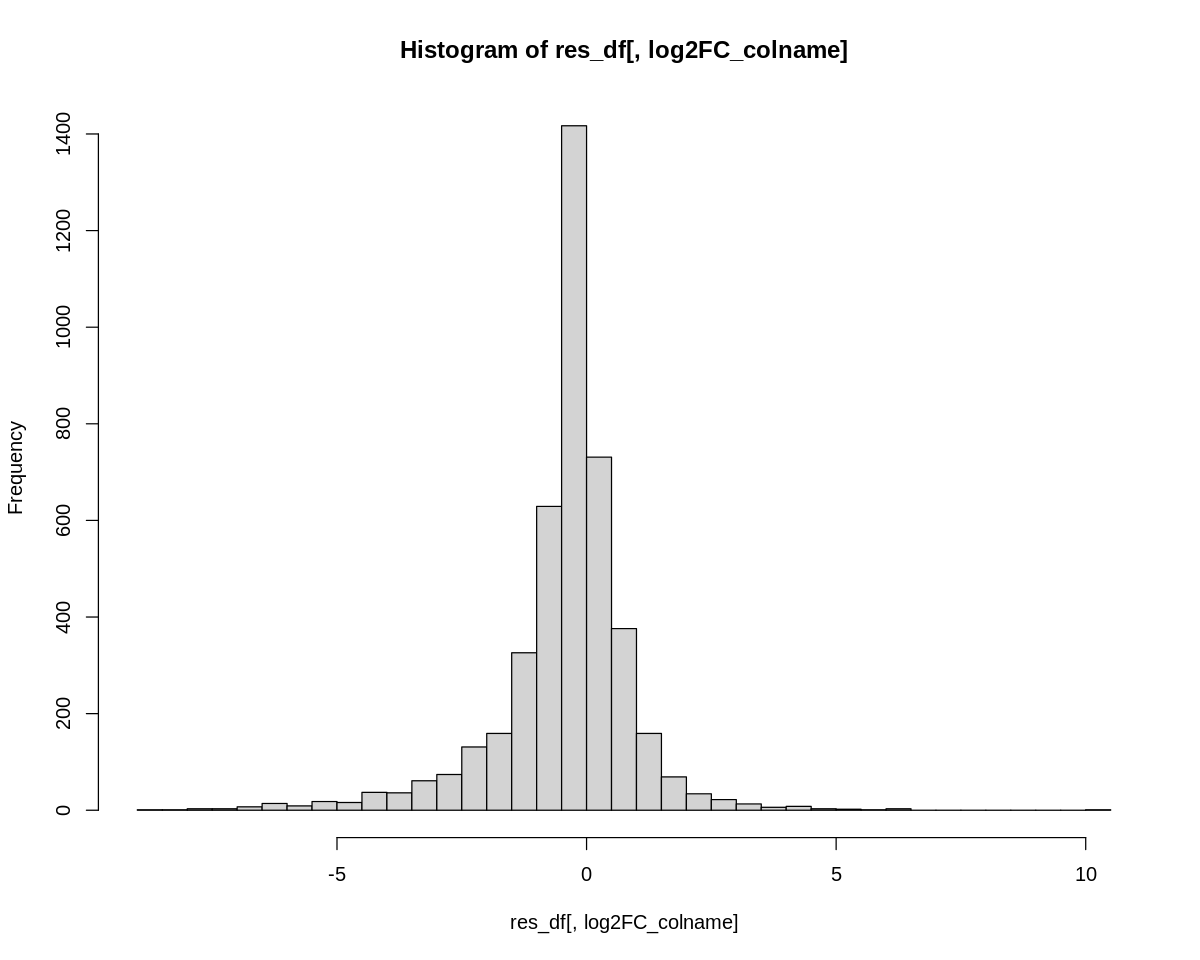

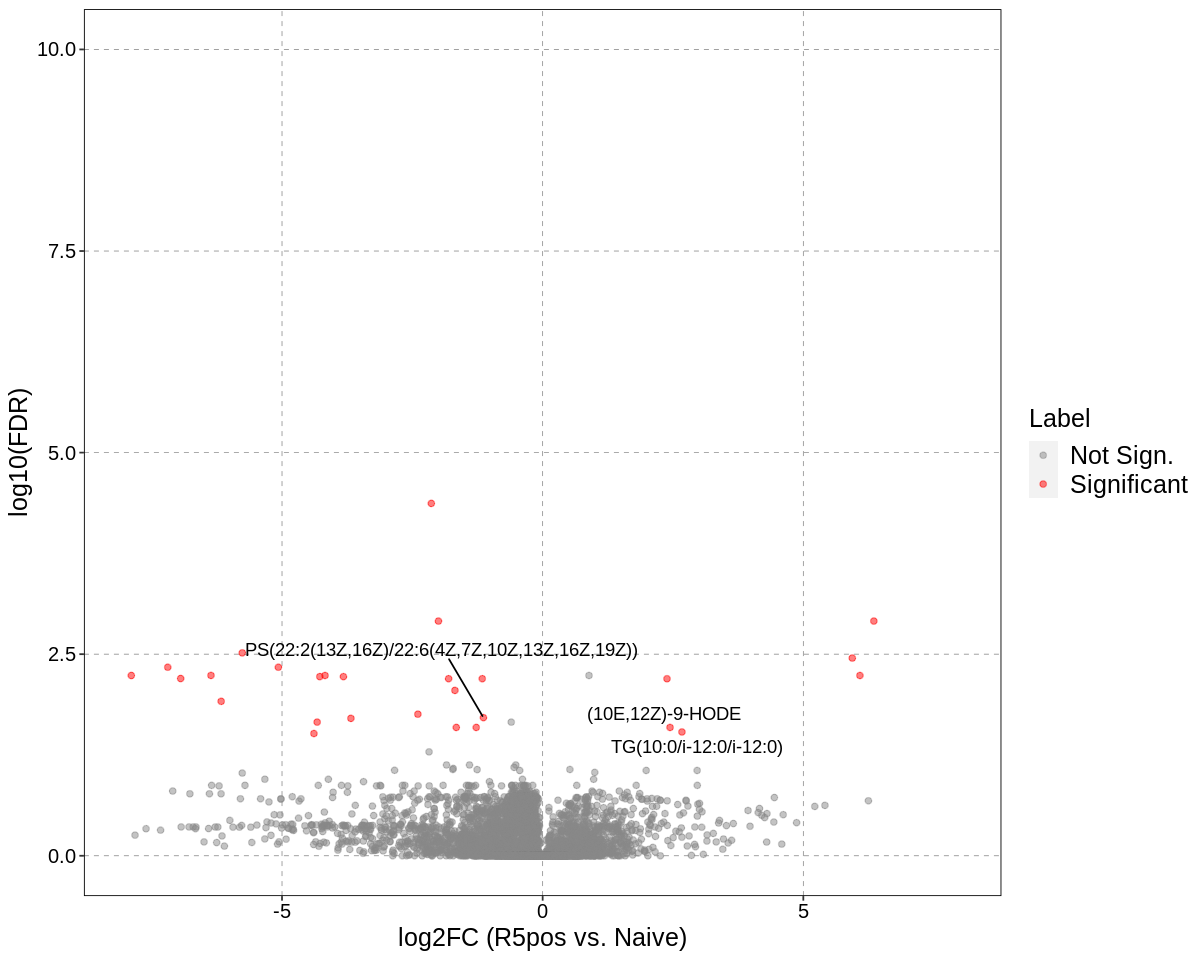

In [80]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('contrast',"highlight"),
                show_plot = TRUE)

-----

-----

-----

-----

# Volcano plot
## log2FC R5neg vs Naive

In [81]:
padj_colname = 'TFDR_R5neg.Naive'
log2FC_colname = 'log2FC_R5negvsNaive'
contrast = "R5neg vs. Naive"

In [82]:
want2annotate_feature_name = TRUE
topN = 1000

select_topN2present <- function(res_df, annot_df, topN, padj_label) {
    res_df = res_df %>% arrange_(padj_colname) 
    featIDs = rownames(res_df[1:topN,])
    annot_list = list()
    res_df['highlight'] = ""
    for (featID in featIDs) {
        res_df[featID,'highlight'] = annot_df[annot_df['X.peak.id_number']==featID,'name_1st_guess'][1]
    }
    
    return(res_df)
}

if(want2annotate_feature_name) {
    annot_df = read.csv(annot_file_name, sep = '\t') #somehow only dplyr read.csv works 
    res_df = select_topN2present(res_df, annot_df, topN)
}

## Volcano plot function

In [83]:
volcano_plot <- function(res_df = res_df,
                            padj_colname = padj_colname,
                            log2FC_colname = log2FC_colname,
                            p_cut_off = p_cut_off,
                            log2FC_cut_off = log2FC_cut_off,
                            xlab = xlab,
                            ylab = 'log10(FDR)',
                            xlim = xlim,
                            ylim = ylim,
                            highlight_text = FALSE,
                            fig_width = 8,
                            fig_height = 8,
                            text_size = 20,
                            legend_size = 20,
                            axis_title_size = 20,
                            output_dir = "",
                            pdf_prefix = 'test',
                            show_plot = TRUE) {
    
    colnames(res_df)
    res_df = mutate(res_df, 
                     Label = ifelse((res_df[,padj_colname] < p_cut_off) & (abs(res_df[,log2FC_colname]) > 1),  # Label is the column that distinguish the coloring
                                  "Significant", 
                                  "Not Sign.")) #mutate is a good function 

    res_df$log10padj = -log(res_df[,padj_colname],10)
    print(paste0("range of log10padj: ", range(res_df$log10padj),'\n', "range of log2FC: ", range(res_df$log2FC)))
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)
    
    hist(res_df[,log2FC_colname], breaks =30)
    
    p = ggplot( res_df, 
                aes_string(log2FC_colname,"log10padj")) +
                geom_point(aes(col=Label), alpha = 0.5) +
                scale_color_manual(values=c("#888888","#ff0000")) +
                xlim(xlim) + 
                ylim(ylim) + 
                xlab(xlab) +
                ylab(ylab) +
                
                theme(
                      panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
                      panel.border = element_rect(fill = NA),
                      #panel.grid.minor = element_blank(),
                      panel.background = element_rect(fill = "transparent",colour = NA),
                      plot.background = element_rect(fill = "transparent",colour = NA),
                      axis.text = element_text(size = text_size, colour="black"),
                      axis.text.x = element_text(colour="black"),
                      legend.text= element_text(size = legend_size),
                      legend.title = element_text(size = legend_size),
                      axis.title = element_text(size = axis_title_size)
                    )
    if(highlight_text == TRUE) {
        print("With highlighted text")
        p = p + geom_text_repel(data = filter(res_df, highlight != ""), aes(label = highlight))
    }
    
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, 
                             glue("volcano_plot",
                                                pdf_prefix,".pdf")), 
                   width = fig_width, 
                   height = fig_height)
        }
}

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"               
[2] "range of log10padj: 9.7034481701307\nrange of log2FC: -Inf"


Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


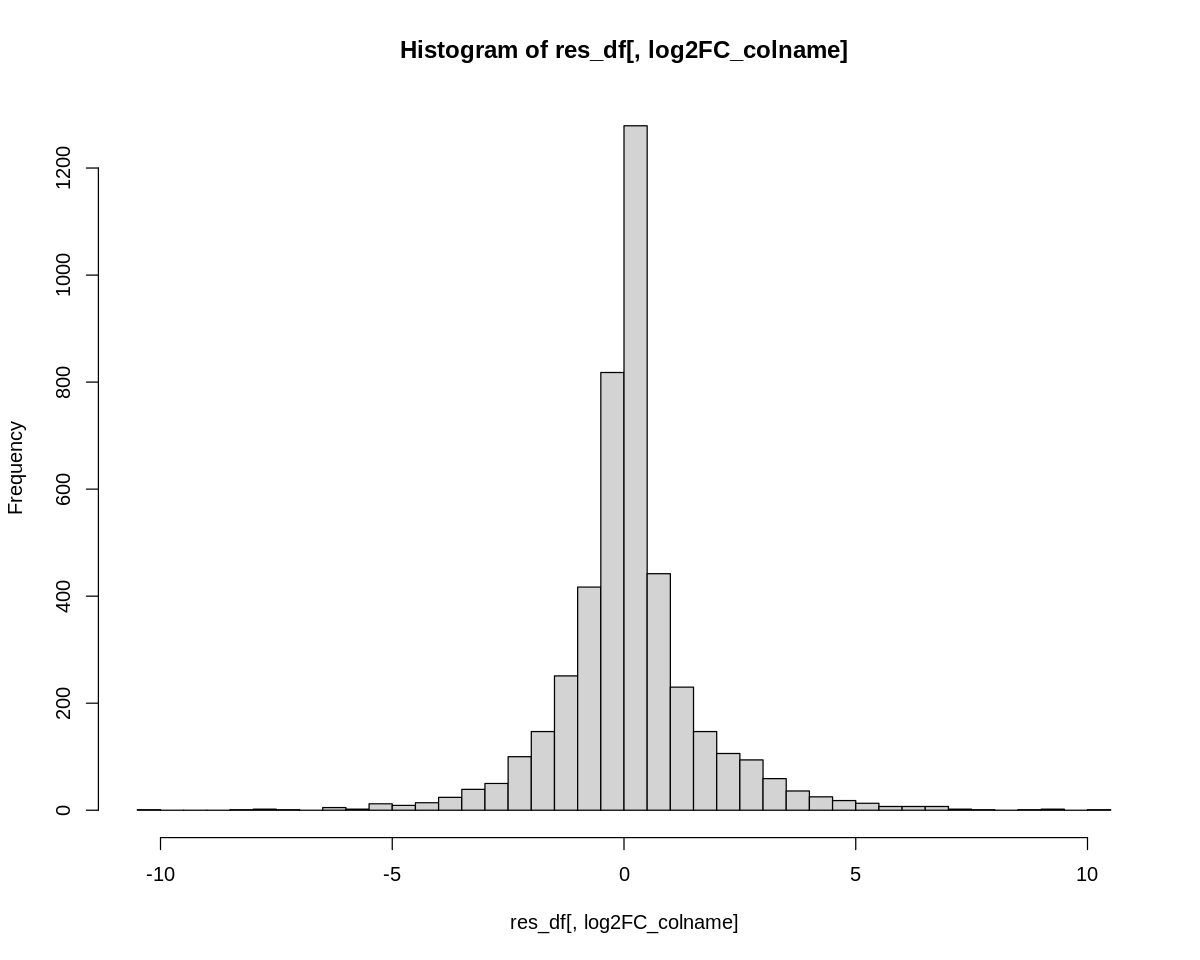

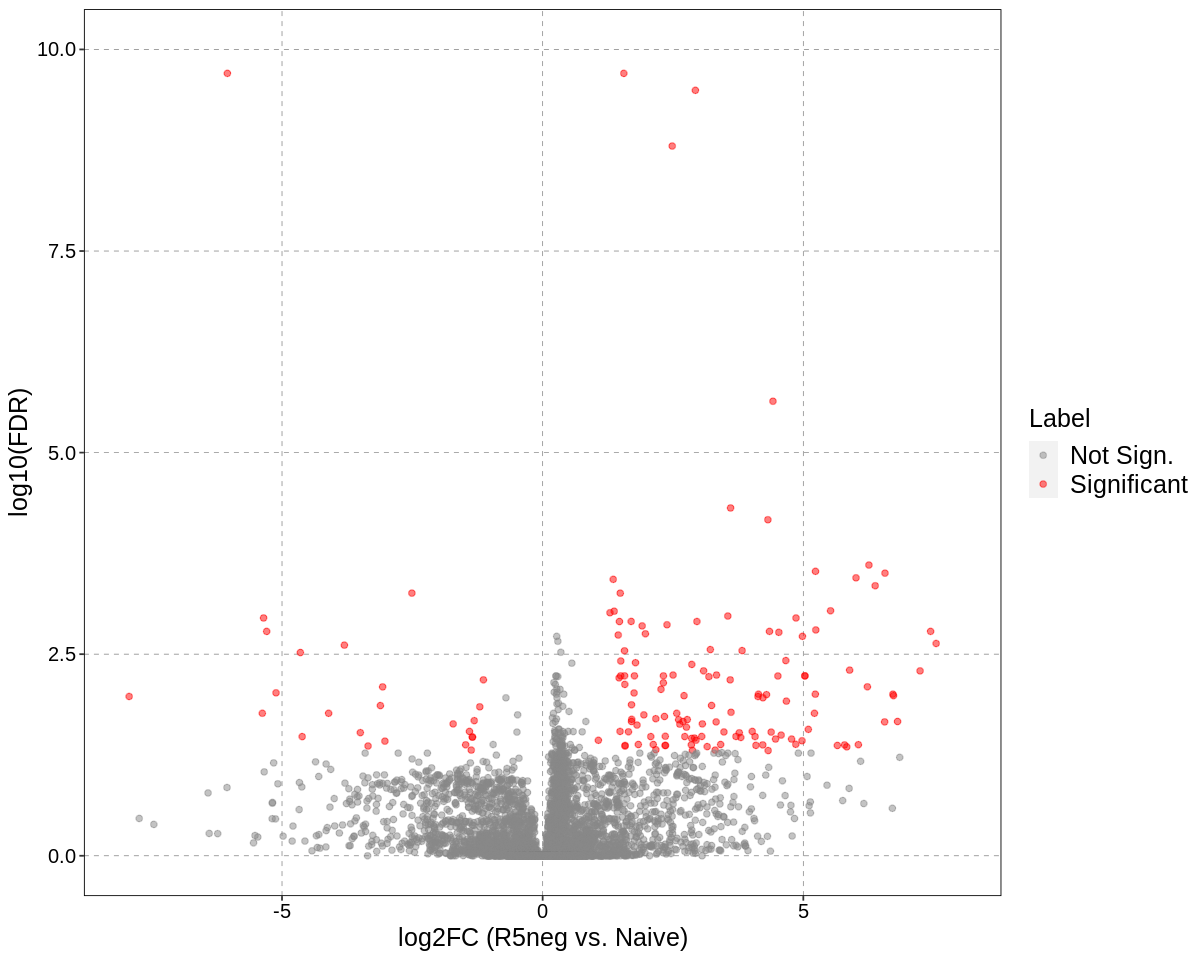

In [84]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = 'contrast',
                show_plot = TRUE)

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"               
[2] "range of log10padj: 9.7034481701307\nrange of log2FC: -Inf"
[1] "With highlighted text"


Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 191 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbc

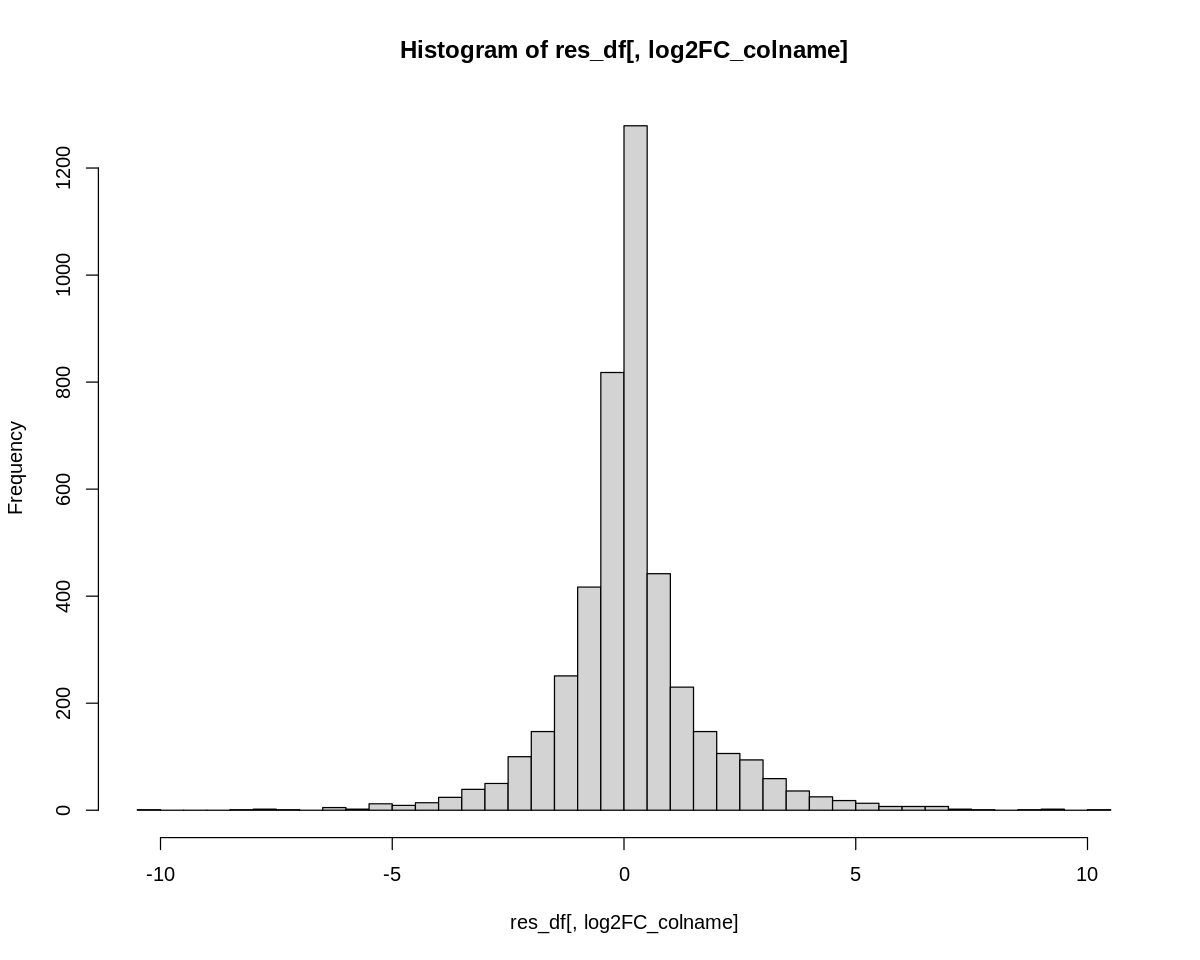

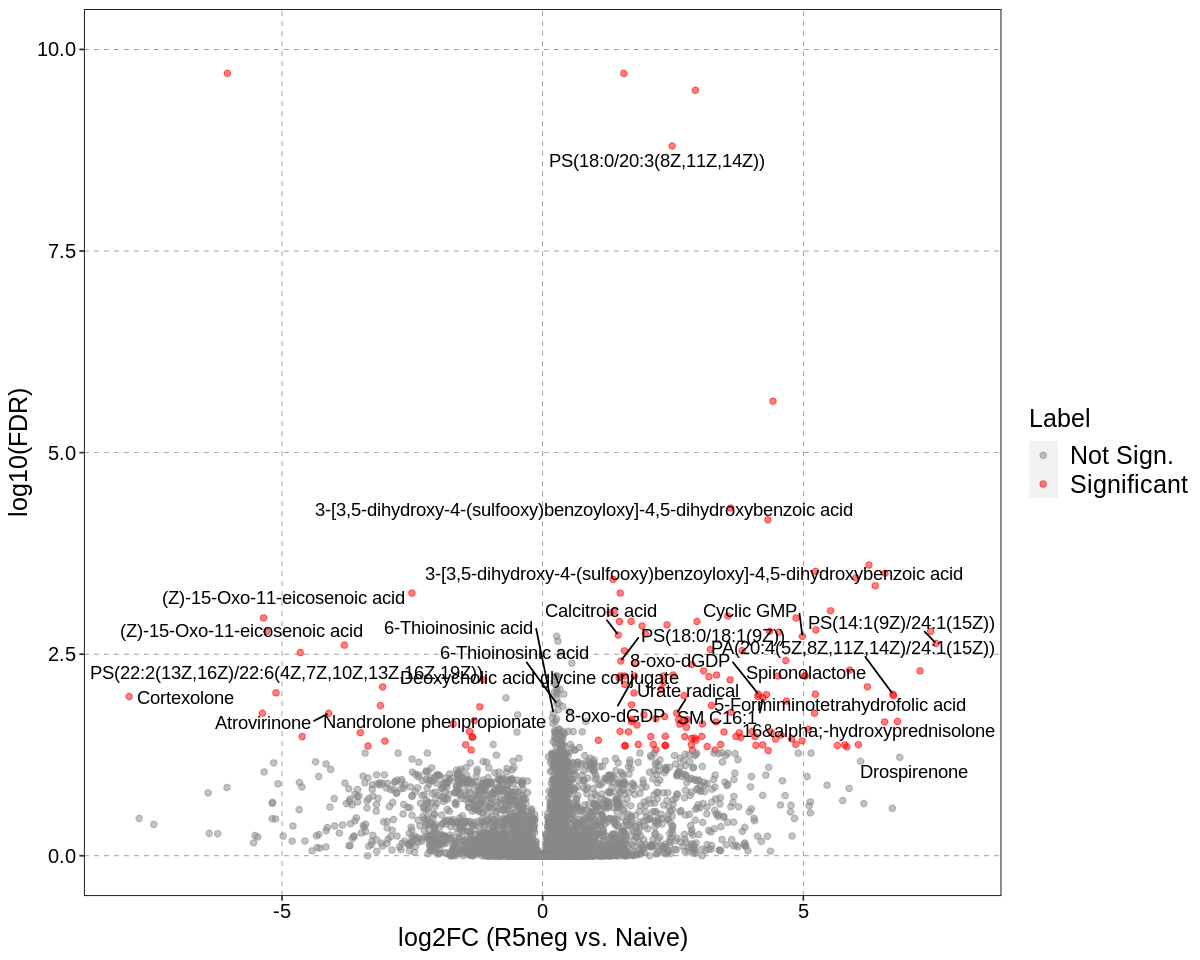

In [85]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('contrast',"highlight"),
                show_plot = TRUE)